In [11]:
import masknmf
from pathlib import Path
import fastplotlib as fpl
import tifffile
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

try:
    import mbo_utilities as mbo
except ImportError:
    print("!uv pip install git+https://github.com/MillerBrainObservatory/mbo_utilities.git@dev")
    
from scipy.ndimage import fourier_shift
from skimage.registration import phase_cross_correlation

from mbo_utilities import log, lazy_array
from mbo_utilities.phasecorr import _phase_corr_2d, apply_scan_phase_offsets, _apply_offset

from masknmf import DemixingResults, PMDArray
import fastplotlib as fpl

In [24]:
def load_from_dir(plane_dir):
    """
    Load all result files generated by `run_plane` from a given plane directory.

    Returns
    -------
    dict
        Dictionary with the following keys:

        - 'moco': np.ndarray
              Motion-corrected data array.

        - 'pmd_demixer': object
              Deserialized PMD demixer object containing the full demixing state.

        - 'a': np.ndarray
              Spatial components array with shape (height, width, n_components).
              Each component is a 2D spatial footprint.

        - 'c': np.ndarray
              Temporal components array with shape (n_frames, n_components).
              Each column is a time series for one component.
    """
    plane_dir = Path(plane_dir).expanduser()

    results = {}
    moco_path = plane_dir / "data_reg.npy"
    pmd_demixer_path = plane_dir / "pmd_demixer.npy"
    a_path = plane_dir / "a.npy"
    c_path = plane_dir / "a.npy"

    if moco_path.exists():
        results["moco"] = np.load(moco_path, allow_pickle=True)
    if pmd_demixer_path.exists():
        results["pmd_demixer"] = np.load(pmd_demixer_path, allow_pickle=True).item()
    if a_path.exists():
        results["a"] = np.load(a_path)
    if c_path.exists():
        results["c"] = np.load(c_path)
    return results

def make_demixing_video(
    results: DemixingResults,
    device: str,
    v_range: tuple[float, float],
    show_histogram: bool = False,
) -> fpl.ImageWidget:
    
    results.to(device)
    ac_arr = results.ac_array
    fluctuating_arr = results.fluctuating_background_array
    pmd_arr = results.pmd_array
    residual_arr = results.residual_array
    colorful_arr = results.colorful_ac_array
    static_bg = results.baseline.cpu().numpy()

    iw = fpl.ImageWidget(
        data=[pmd_arr, ac_arr, fluctuating_arr, residual_arr, colorful_arr, static_bg],
        names=[
            "pmd",
            "signals",
            "fluctuating bkgd",
            "residual",
            "colorful signals",
            "static Bkgd",
        ],
        rgb=[False, False, False, False, True, False],
        histogram_widget=show_histogram,
        graphic_kwargs={"vmin": v_range[0], "vmax": v_range[1]}
        if v_range is not None
        else None,
        figure_kwargs={"size": (800, 800)},
    )

    for i, subplot in enumerate(iw.figure):
        if i == 4:
            ig = subplot["image_widget_managed"]
            iw.vmin = 0
            ig.vmax = 255

    return iw

In [21]:
fpath = r"D:\tests_plane11\roi2\no_corr\plane11"
raw = lazy_array.LazyArrayLoader(fpath).load()
raw.shape

Checking for demixer in D:\tests_plane11\roi2\no_corr\plane11
Found demixer in D:\tests_plane11\roi2\no_corr\plane11, loading demixer results.


(5632, 448, 224)

In [22]:
res = load_from_dir(fpath)
res.keys()

dict_keys(['moco', 'pmd_demixer', 'a', 'c'])

In [141]:
arr = lazy_array.LazyArrayLoader(f"D:/tests_plane11/roi2/interp1").load()
arr.shape

(5632, 448, 224)

RFBOutputContext()

JupyterRenderCanvas(css_height='800.0px', css_width='800.0px')
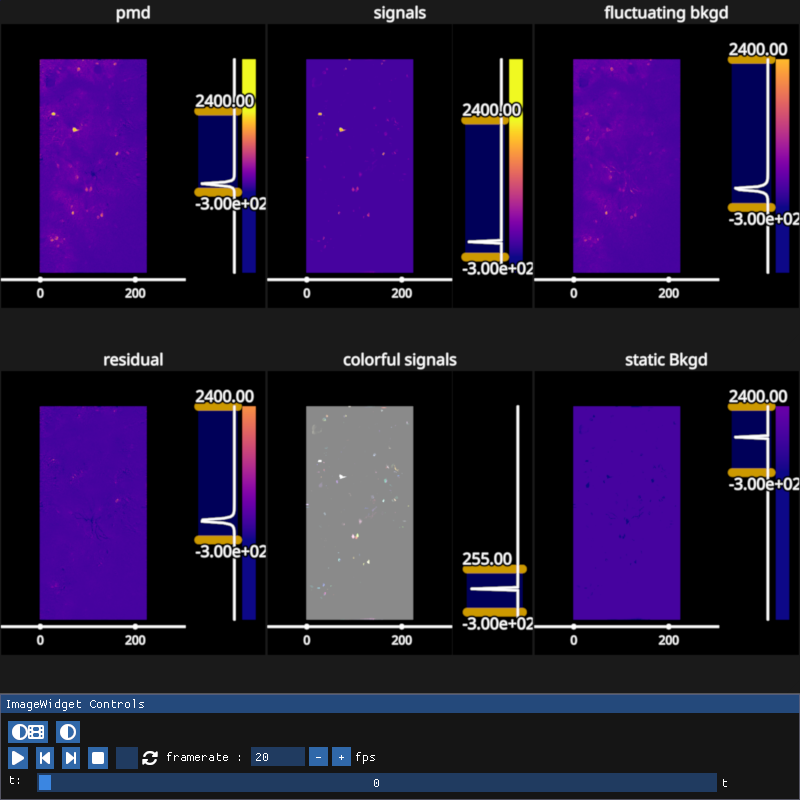

In [149]:
results = load_from_dir(r"D:\tests_bigmem\roi2\masknmf\plane11")

iw = make_demixing_video(
    results["pmd_demixer"].results,
    'cuda',
    show_histogram=True,
    v_range=[-300, 2400],
)
for subplot in iwd.figure:
    subplot.toolbar = False
iw.show()

RFBOutputContext()

JupyterRenderCanvas(css_height='800.0px', css_width='800.0px')
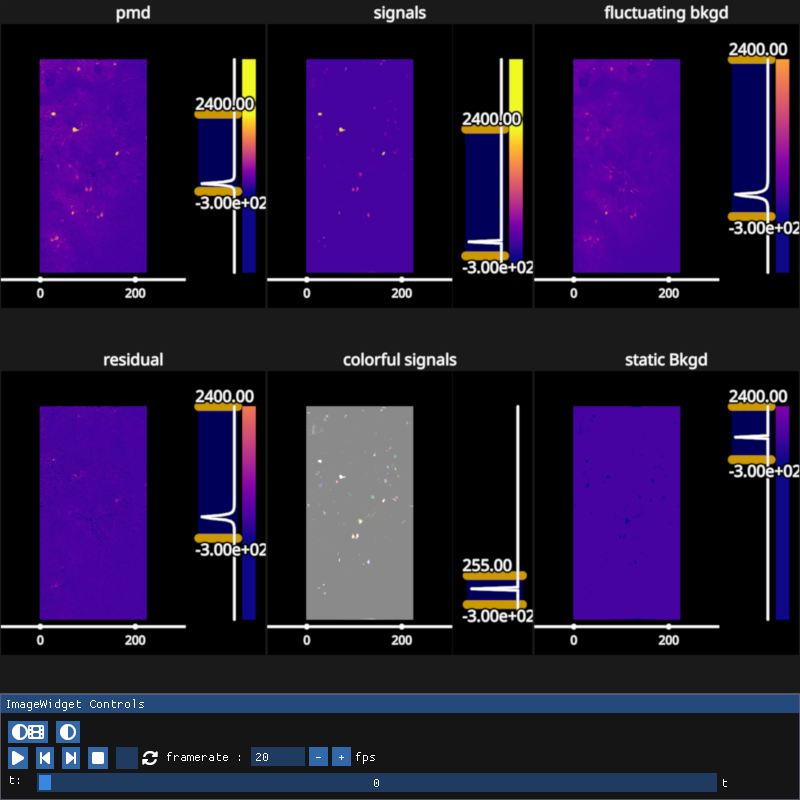

In [147]:
results = load_from_dir(r"D:\tests_plane11\roi2\interp1\plane11_interp_4strips")
iw = make_demixing_video(
    results["pmd_demixer"].results,
    'cuda',
    show_histogram=True,
    v_range=[-300, 2400],
)
for subplot in iwd.figure:
    subplot.toolbar = False
iw.show()

In [148]:
iw.close()

RFBOutputContext()

JupyterRenderCanvas(css_height='800.0px', css_width='800.0px')
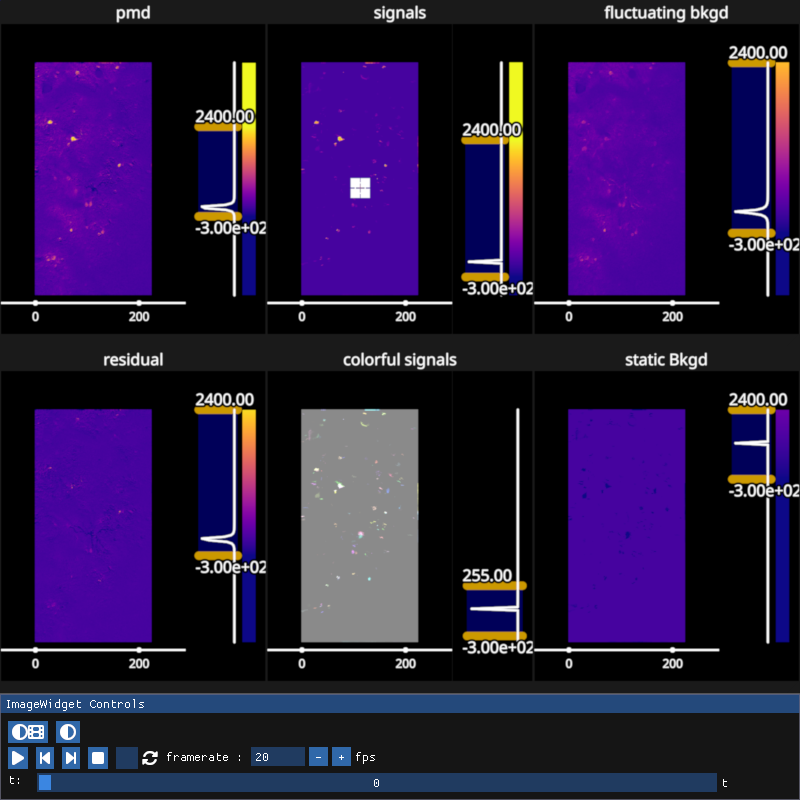

Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (7)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (8)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (9)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (10)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (11)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (12)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (13)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (14)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (15)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (16)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (17)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (18)
Draw error: IM_ASSERT( (g.FrameCount == 0 || g.FrameCountEnded == g.F… (19)
Draw error: IM_

In [130]:
iwd = make_demixing_video(
    res["pmd_demixer"].results,
    'cuda',
    show_histogram=True,
    v_range=[-300, 2400],
)

c1_indices = tuple([np.arange(231, 252), np.arange(103, 123)])
ys, xs = c1_indices
selection = (xs.min(), xs.max(), ys.min(), ys.max())
selector = iwd.figure["signals"].graphics[0].add_rectangle_selector(
    selection=selection,
    edge_color="w",
    edge_thickness=1.0,
    vertex_color="w",
    resizable=False
)


iwd.show()

In [136]:
iw.close()

In [129]:
sync_plot = "signals"

figure = fpl.Figure(
    shape=(1, 2),
    size=(700, 560)
)

data = selector.get_selected_data()
image_graphic = figure[0, 0].add_image(data=data)
zoom_ig = figure[0, 0].add_image(rectangle_selector.get_selected_data())

RFBOutputContext()

In [128]:
def update_data(ev):
    new_data = ev.get_selected_data()
    global zoom_ig
    figure[0, 0].remove_graphic(zoom_ig)
    zoom_ig = figure[0, 0].add_image(data=new_data)
    figure[0, 0].auto_scale()

In [151]:
type(results["pmd_demixer"].pmd_obj)

masknmf.compression.pmd_array.PMDArray